In [2]:
import pandas as pd

In [15]:
fpp_all = pd.read_csv('fpp_final_table.csv')

In [4]:
fpp_all.count()

koi                     7280
koi.1                   7280
rprs                    6040
secthresh               6040
maxrad                  6040
pr_heb                  5930
pr_eb                   5930
pr_beb                  5930
fp                      5977
FPP                     5930
rp                      5968
disposition             7280
prob_ontarget           5546
pos_prob_score          5959
not_transitlike         7280
signficant_secondary    7280
centroid_offset         7280
ephem_match             7280
dtype: int64

In [16]:
confirmed = fpp_all['disposition'] == 'CONFIRMED'
known_fp = fpp_all['disposition'] == 'FALSE POSITIVE'
candidate = fpp_all['disposition'] == 'CANDIDATE'
low_fpp = fpp_all['FPP'] < 0.01
high_fpp = fpp_all['FPP'] > 0.9
on_target = fpp_all['prob_ontarget'] > 0.99

In [14]:
(low_fpp & candidate & on_target).sum()

1481

In [7]:
(high_fpp & candidate).sum()

261

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def fpp_summaryplot(data=fpp_all,fig=None,symbol='o',ms=1,color='k',
                    markrs=[1,1.5,2,2.5,3,4,10],nbins=None,alpha=0.5,
                    title=None,hlineval=0.01,labelpos=(0.75,0.15),
                    summarylabel=True,erasedata=None,titlefontsize=20,
                    titlexy=(0.25,0.85),showcc=False,cc_symbol='o',
                    cc_ms=2,cc_color='b',rao_color='c',prelim=False,
                    **kwargs):
    
    inds = np.argsort(data['rp'])
    ypts = data['FPP'][inds].clip(1e-4,1)
    xpts = np.arange(len(data))
    plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)
    if showcc:
        hascc = data['AO'][inds] != 'None'
        has_rao = data['RAO'][inds]
        plt.semilogy(xpts[np.where(hascc & ~has_rao)],ypts[hascc & ~has_rao],
                     cc_symbol,ms=cc_ms,color=cc_color,
                     mec=cc_color)
        plt.semilogy(xpts[np.where(has_rao)],ypts[has_rao],cc_symbol,
                     ms=cc_ms,color=rao_color,
                     mec=rao_color)

        
    if erasedata is not None:
        plt.semilogy(ypts,symbol,ms=ms,color=color,alpha=alpha,**kwargs)
    plt.ylim(ymin=8e-5)
    xmax = inds.max()+1
    plt.xlim(xmax=xmax)
    plt.xticks([])

    ax = plt.gca()

    plt.axhline(hlineval,color='k',lw=2)

    for r in markrs:
        i = np.argmin(np.absolute(data['rp'][inds]-r))
        ax.axvline(i,color='k',lw=3,ls=':')
        ax.annotate(r'%.1f' % r,xy=(float(i)/xmax,-0.05),xycoords='axes fraction',ha='center',
                    annotation_clip=False,fontsize=14)
        

    if nbins is not None:
        N = len(ypts)
        binsize = N/nbins
        xbins = []
        ybins = []
        yerrs = []
        for i in range(nbins):
            xbins.append((xpts[i*binsize:(i+1)*binsize]).mean())
            ybins.append(np.median(ypts[i*binsize:(i+1)*binsize]))
            yerrs.append((ypts[i*binsize:(i+1)*binsize]).std())
        #plt.errorbar(xbins,ybins,yerr=yerrs,color=linecolor,fmt='o',ms=5)
        plt.plot(xbins,ybins,'wo',ms=15)
        plt.plot(xbins,ybins,'ko',ms=13)
        plt.plot(xbins,ybins,'ro',ms=12)

    plt.xlabel('Planet Radius [$R_\oplus$]',labelpad=30)
    plt.ylabel('False Positive Probability')

    if title is not None:
        plt.annotate(title,xy=titlexy,xycoords='axes fraction',
                     fontsize=titlefontsize,
                     bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')

    if summarylabel:
        N = float(len(data))
        gt_50pct = (data['FPP'] > 0.5).sum()
        lt_1pct = (data['FPP'] < 0.01).sum()
        #lt_03pct = (data['FPP'] < 0.003).sum()
        plt.annotate('%i/%i FPP > 50%%\n%i/%i FPP < 1%%' % 
                     (gt_50pct,N,lt_1pct,N),xy=labelpos,xycoords='axes fraction',
                     fontsize=15,bbox=dict(boxstyle='round',fc='w',lw=2),ha='center')

    if prelim:
        plt.annotate('Preliminary',xy=(0.05,0.12),xycoords='axes fraction',
                     fontsize=14,color='r',rotation=-30,
                     bbox=dict(boxstyle='round',fc='w',lw=2,color='r'),va='center')


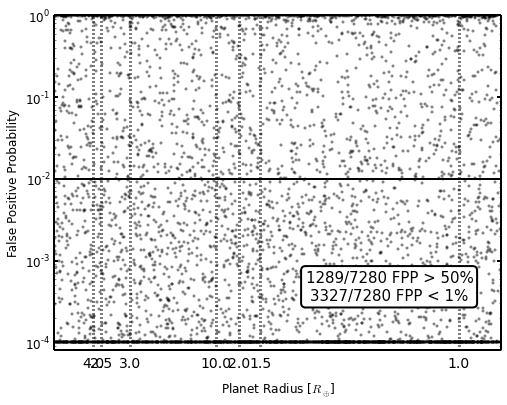

In [21]:
%matplotlib inline
plt.figure(figsize=(8,6))
fpp_summaryplot()

In [22]:
plt.
fpp_all['rp']

0         13.116011
1         16.046068
2          4.705538
3         10.259015
4          7.193851
5               NaN
6         40.047016
7          4.230971
8          2.129880
9          9.522957
10        15.283184
11         8.617224
12        18.366777
13        16.641893
14         4.700304
15        62.217524
16        59.367179
17        13.353185
18        15.432141
19        12.146159
20        16.907746
21        20.072251
22        12.167096
23        17.853499
24         9.439428
25        24.840600
26        28.381857
27       111.444766
28      6313.088989
29        75.849102
           ...     
7250       1.599809
7251            NaN
7252            NaN
7253            NaN
7254            NaN
7255            NaN
7256            NaN
7257      27.756480
7258            NaN
7259            NaN
7260            NaN
7261            NaN
7262            NaN
7263       2.074703
7264            NaN
7265            NaN
7266            NaN
7267            NaN
7268            NaN
